In [1]:
import xarray as xr
import xrft
import matplotlib.pyplot as plt
import numpy as np

%reload_ext autoreload
%autoreload 2
    
from sim_analysis_modules import create_leaf, analyze_sims

In [49]:
import sys
sys.path.append('/home/db194/mom6_notebooks/helpers/')
from plot_helpers import *

In [2]:
scales = ['20','40']
#Cvals = ['0','0.1','0.2','0.25','0.3','0.4','0.5','1']
Cvals = ['0','0.1','0.2','0.3','0.4','0.5','1']

In [3]:
dir_5km = '/scratch/db194/mom6/tests_double_gyre/generate_data/double_gyre_5km/'
ds_HR = analyze_sims(dir_5km)

ERROR 1: PROJ: proj_create_from_database: Open of /ext3/miniforge/share/proj failed


problem in cont file.


In [4]:
ds_ANN_dic = {}

dir = '/scratch/db194/mom6/tests_double_gyre/tests_local_para_perp_arch_18mar_2024/'

for L in scales:
    for c in Cvals:
        if c == '0':
            dir_case = '/scratch/db194/mom6/tests_double_gyre/double_gyre_'+L+'km/'
        elif c=='1':
            dir_case = dir+L+'km/double_gyre_'+L+'km_ANN_FGR5/'
        else:
            intp = str(int(float(c)*10))
            dir_case = dir+L+'km/double_gyre_'+L+'km_ANN_FGR5_Cperp_p'+intp+'_Cpara_p'+intp+'/'
        print(dir_case)
        create_leaf(ds_ANN_dic, [L, c], analyze_sims(dir_case))
        

/scratch/db194/mom6/tests_double_gyre/double_gyre_20km/
problem in cont file.
/scratch/db194/mom6/tests_double_gyre/tests_local_para_perp_arch_18mar_2024/20km/double_gyre_20km_ANN_FGR5_Cperp_p1_Cpara_p1/
/scratch/db194/mom6/tests_double_gyre/tests_local_para_perp_arch_18mar_2024/20km/double_gyre_20km_ANN_FGR5_Cperp_p2_Cpara_p2/
/scratch/db194/mom6/tests_double_gyre/tests_local_para_perp_arch_18mar_2024/20km/double_gyre_20km_ANN_FGR5_Cperp_p3_Cpara_p3/
/scratch/db194/mom6/tests_double_gyre/tests_local_para_perp_arch_18mar_2024/20km/double_gyre_20km_ANN_FGR5_Cperp_p4_Cpara_p4/
/scratch/db194/mom6/tests_double_gyre/tests_local_para_perp_arch_18mar_2024/20km/double_gyre_20km_ANN_FGR5_Cperp_p5_Cpara_p5/
/scratch/db194/mom6/tests_double_gyre/tests_local_para_perp_arch_18mar_2024/20km/double_gyre_20km_ANN_FGR5/
/scratch/db194/mom6/tests_double_gyre/double_gyre_40km/
problem in cont file.
/scratch/db194/mom6/tests_double_gyre/tests_local_para_perp_arch_18mar_2024/40km/double_gyre_40km_ANN_FGR5

In [44]:
def plot(idT):
    plt.figure(figsize=(17, 8))

    #idT = 100

    vmin = -8e-6

    plt.subplot(3,7,1)
    ds_HR.prog.RV.isel(Time=idT, zl=0).plot(vmin=vmin, add_colorbar=False)
    plt.title('5 km')
    plt.xlabel('X [km]')
    plt.ylabel('Y [km]')

    n=0
    for L in scales:
        for c in Cvals:
            plt.subplot(3,7,8+n)
            da = ds_ANN_dic[L][c].prog.RV.isel(Time=slice(1,None,2))
            da.isel(Time=idT, zl=0).plot(vmin=vmin, add_colorbar=False)
            plt.title(L+'km, ANN, C='+c)
            plt.xlabel('X [km]')
            plt.ylabel('Y [km]')
            n=n+1
    
    plt.tight_layout()
    plt.suptitle('Time:'+str(int(ds_HR.prog.Time.isel(Time=idT).values)) +' days')

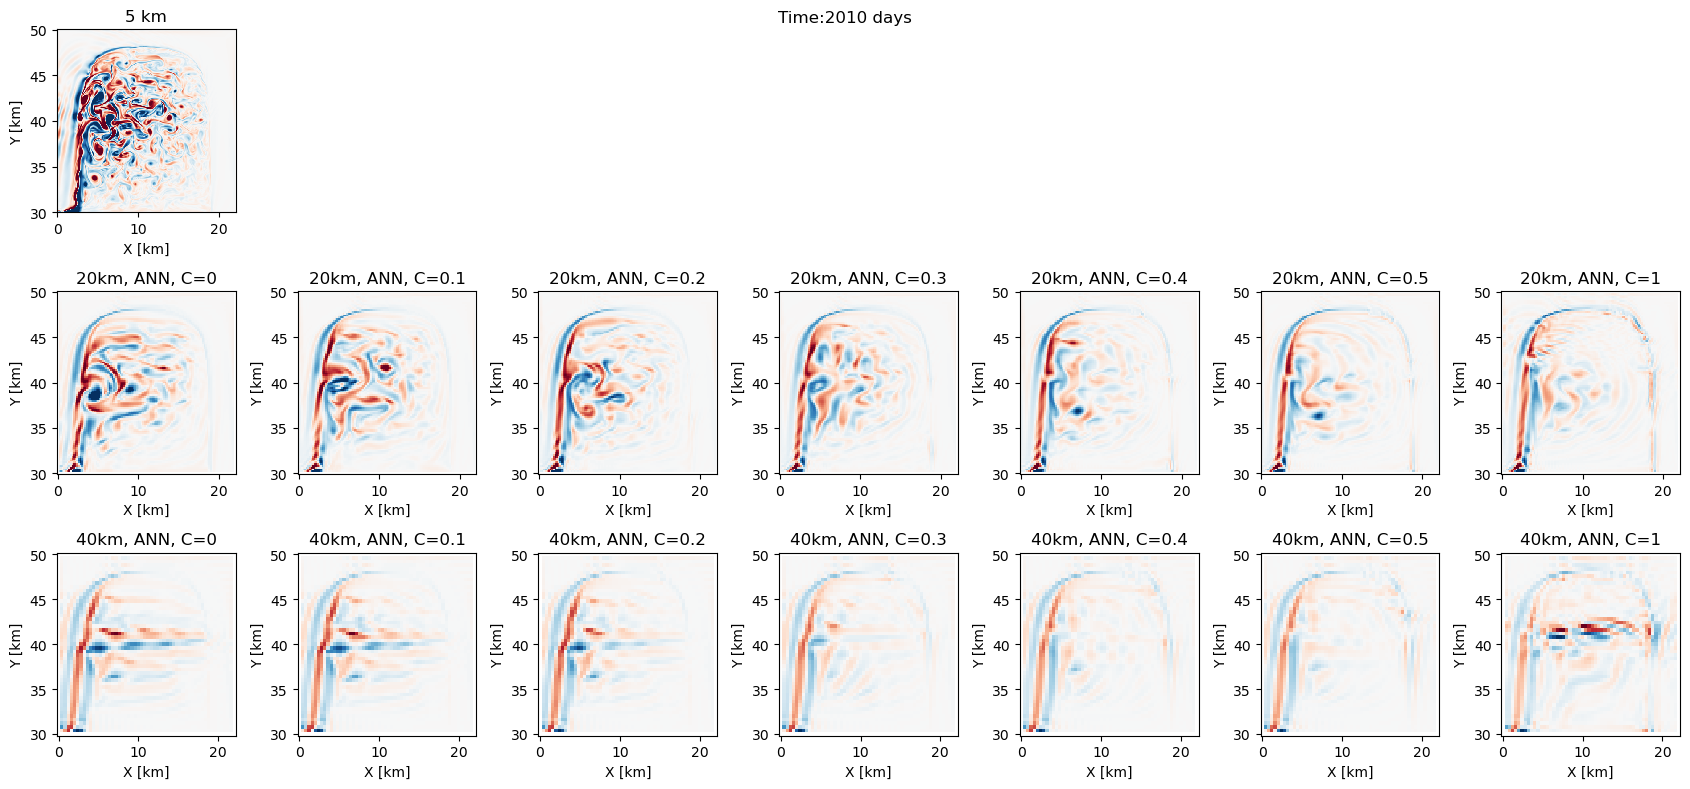

In [47]:
plot(200)

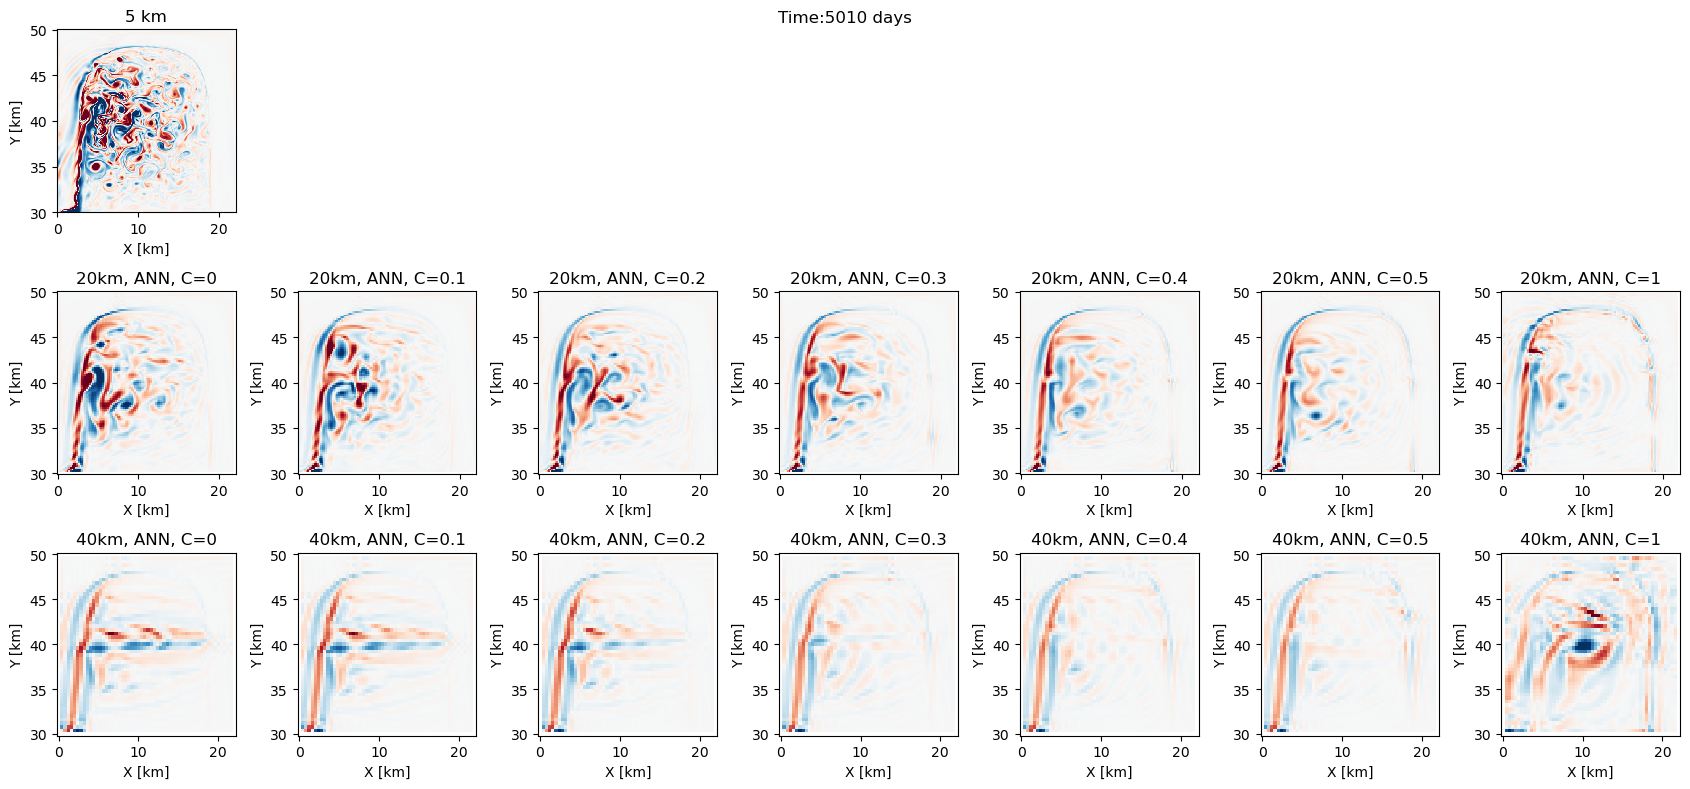

In [46]:
plot(500)

In [50]:
anim_flag = 1
if anim_flag == 1:
    create_animation(plot, range(0,300), 'DoubleGyre.gif', dpi=100, FPS=4)

Animation at FPS=4 will last for 75.0 seconds
